In [1]:
%pylab inline
from scipy import interpolate
from octopus import profiles

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [25]:
data = np.loadtxt('contra_format.txt')

r_i = data[:,0]
r_f = data[:,1]

rho_i = data[:,4]
rho_f = data[:,5]

r_vir = 300
M_vir = 1.5E12

rho_i = rho_i * M_vir/r_vir**3.0
rho_f = rho_f * M_vir/r_vir**3.0

In [29]:
profiles.dens_NFW?

In [56]:
densNFW_i = profiles.dens_NFW(12, r_i*r_vir, 0, 0, M_vir)
densNFW_f = profiles.dens_NFW(16, r_f*r_vir, 0, 0, M_vir)

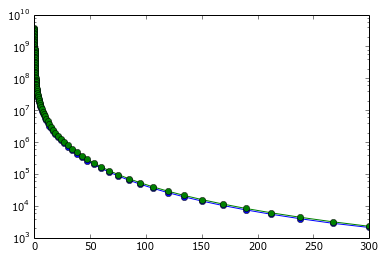

In [49]:
semilogy(r_i*r_vir, rho_i, '-o')
semilogy(r_i*r_vir, densNFW_i, '-o')

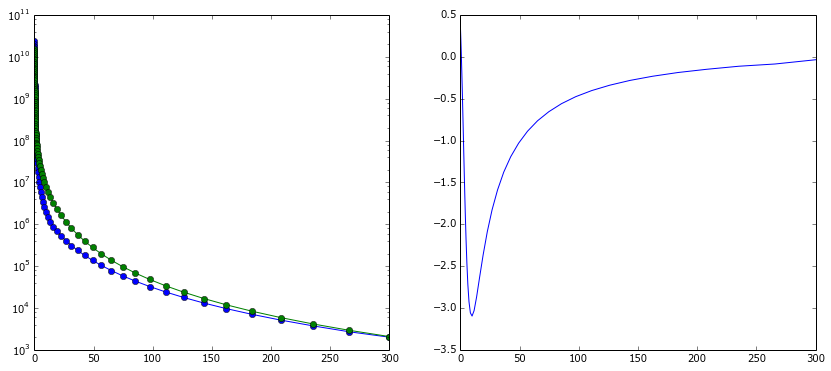

In [57]:
figure(figsize=(14, 6))
subplot(1, 2, 1)
semilogy(r_f*r_vir, rho_f, '-o')
semilogy(r_f*r_vir, densNFW_f, '-o')

subplot(1, 2, 2)
plot(r_f*r_vir, (rho_f-densNFW_f)/rho_f)


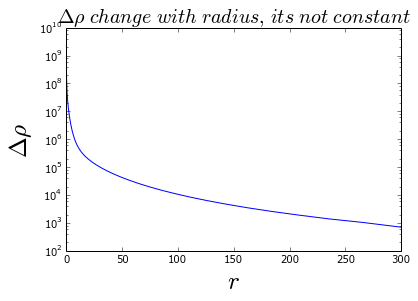

In [94]:
title(r'$\Delta \rho\ change\ with\ radius,\ its\ not\ constant$', fontsize=20)
semilogy(r_f[1:]*r_vir, np.abs([rho_f[i]-rho_f[i-1] for i in range(1,len(rho_f))]))
xlabel('$r$', fontsize=25)
ylabel(r'$\Delta \rho$', fontsize=25)

In [4]:
f = interpolate.interp1d(r_f, rho_f)

In [5]:
r_test = linspace(0.001, 1, 100)
rho_new = f(r_test)


r_test2 = logspace(-4, 0, 100)
rho_new2 = f(r_test2)

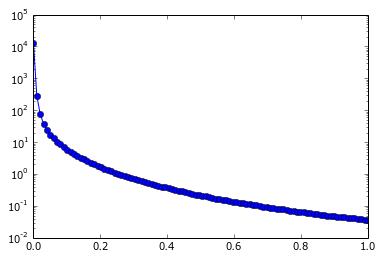

In [6]:
semilogy(r_test, rho_new, '-o')

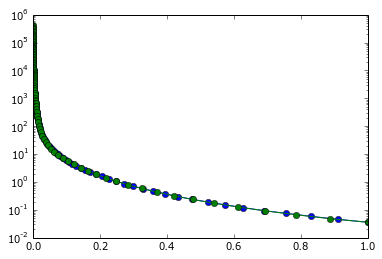

In [7]:
semilogy(r_test2, rho_new2, '-o')
semilogy(r_f, rho_f, '-o', c='g')

In [8]:
def density_interp(r):
    rho_new3 = f(r)
    return rho_new3

In [9]:
from astropy import units, constants
G = constants.G


In [12]:
rho1 = density_interp(0.6)
print rho1* units.Msun /units.kpc**3.* 1E12/(175)**3.0 

25194.1561026 solMass / kpc3


In [13]:
profiles.dens_NFW(12, 175.0*0.6, 0, 0, 1E12)

28673.017403267746

In [14]:
# Potential
r_grid = np.linspace(0.1, 1, 1000000)
dens_grid = density_interp(r_grid)

In [15]:
def integral(x, y):
    #index = np.where(x==r)[0]
    I = np.zeros(len(x))
    for i in range(len(x)-1):
        h = x[i+1] - x[i]
        I[i] = (y[i+1] + y[i])/2.0 * h
    return I

In [16]:
rho_prime = integral(r_grid, dens_grid)
pot_grid = integral(r_grid, rho_prime)

NameError: name 'pot_analtic' is not defined

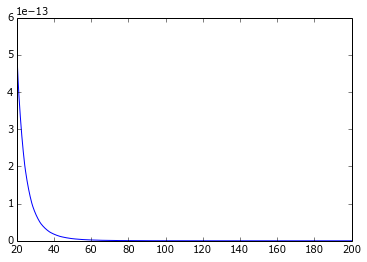

In [17]:
plot((r_grid)*200, pot_grid*(4.0*np.pi*G)* 1E12/(r_grid*200.)**3.0)
plot(r_grid*200, np.abs(pot_analtic))

In [ ]:
pot_analtic = profiles.pot_NFW(12, r_grid*200, 0, 0, 1E12)

In [ ]:
plot(r_grid*200, np.abs(pot_analtic))